In [50]:
import matplotlib.pyplot as plt
import cv2
import torch.nn.functional as F
import numpy as np
import torch

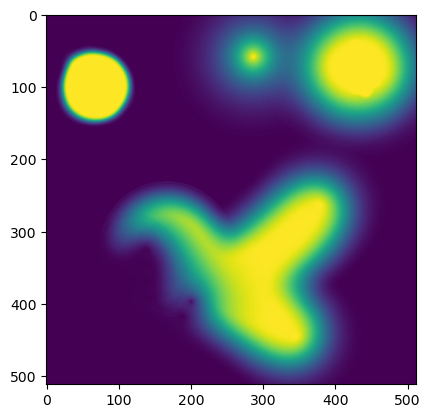

In [23]:
img = cv2.imread('random_sampling_map.jpeg', cv2.IMREAD_GRAYSCALE)/255.
plt.imshow(img)
plt.show()

def tenshow(tensor):
    plt.imshow(tensor.squeeze())
    plt.show()

In [27]:
tensor = torch.from_numpy(img).unsqueeze(0)
tensor.shape


torch.Size([1, 512, 512])

In [57]:
seqs = [tensor[:, ::2**(i+1), ::2**(i+1)] for i in range(7)]

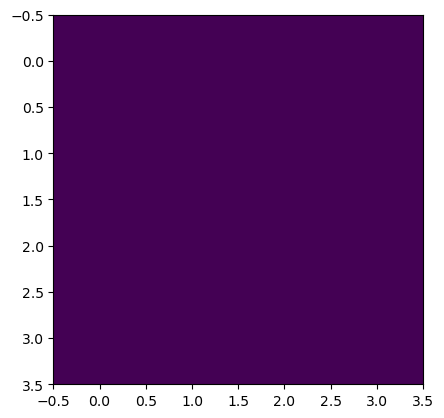

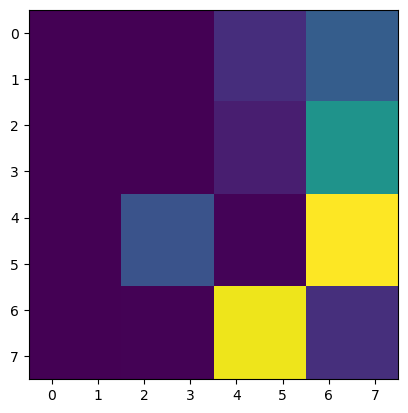

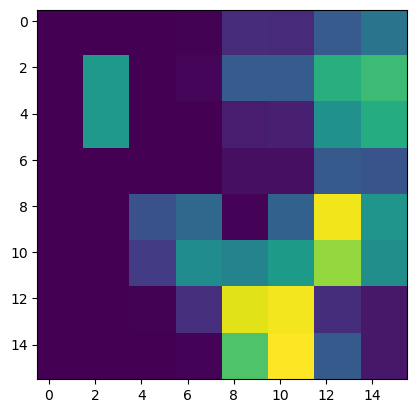

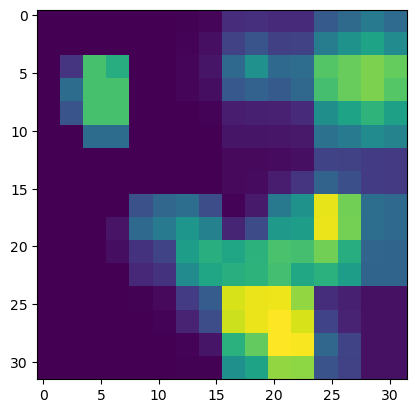

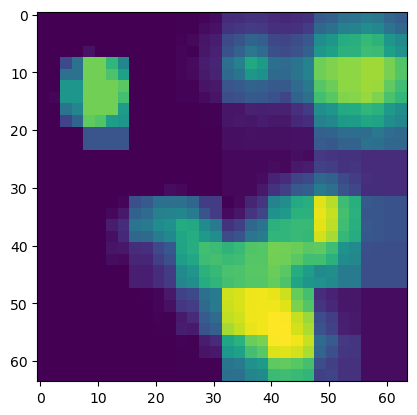

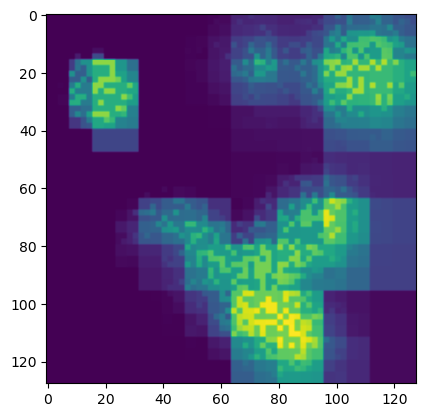

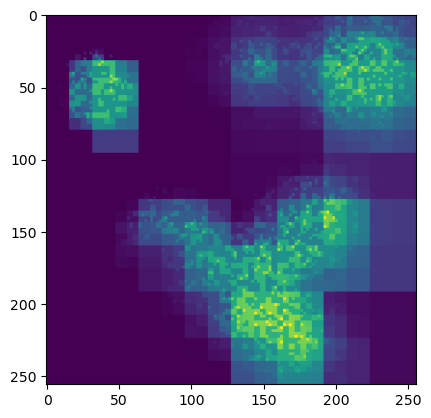

In [67]:
def get_sampled_indices(attribution, n_samples = 16):
    B = attribution.shape[0]
    att = attribution.reshape(B, -1)
    N = att.shape[1]
    if N>n_samples:
        indices = torch.multinomial(att, n_samples, )
    else:
        indices = torch.arange(N).unsqueeze(0)
    return indices
    
def get_sampled_points(indices, org_map):
    B = org_map.shape[0]
    sequence = torch.gather(org_map.reshape(B, -1), 1, indices)
    return sequence

def reposition_sampled_points(attn_map, sampled_points, indices, reduce_mode='mean'):
    B, N, N = attn_map.shape
    attn_map = attn_map.view(B, -1)
    attn_map.scatter_reduce_(dim=1, index=indices, src=sampled_points, reduce=reduce_mode)
    return attn_map.view(B, N, N)

result = torch.zeros_like(seqs[-1])

for seq in seqs[::-1]:
    tenshow(result)
    attn_map = seq
    indices = get_sampled_indices(attn_map, 512)
    samples_points = get_sampled_points(indices, attn_map)    
    result = reposition_sampled_points(result, samples_points, indices, 'sum')
    result = F.interpolate(result.unsqueeze(1), scale_factor=(2,2)).squeeze(1)
